<a href="https://colab.research.google.com/github/phamngocduc/MachineLearning/blob/master/%5BTutorial%5D_House_Prices_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Prices EDA**

---



EDA stands for **Exploratory Data Analysis**, which is an approach to analyzing data sets to summarize their main characteristics, often with visual methods (histogram, scatter plot, box plot, ...).

<center>
<img src="https://i.imgur.com/u3DbAes.png" height="400" />
 </center>

## Inviting some friends to the party

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## The Ames Housing dataset ([Link](https://drive.google.com/open?id=1ZQX5c5tCBizZFVyh6vFqunUxTeix8Yu8))

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 460676 bytes


The Ames dataset consists of **1460** training instances and **1460** testing instances.

The total number of attributes of **79**, of which 36 are *quantitative* and 43 are *qualitative*, describes almost every aspect of residential homes in Ames, Iowa. There are two additional fields:
* **Id**
* **SalePrice**: the property's sale price in dollars. This is the target variable that we are trying to predict.

In [0]:
train = pd.read_csv('train.csv')
print('Shape of training data:', train.shape)

Shape of training data: (1460, 81)


In [0]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print('- Quantitative attributes (%d) :' % len(quantitative))
print(quantitative)
print('- Qualitative attributes (%d) :' % len(qualitative))
print(qualitative)

- Quantitative attributes (36) :
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
- Qualitative attributes (43) :
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fir

## Analysing 'SalePrice'

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


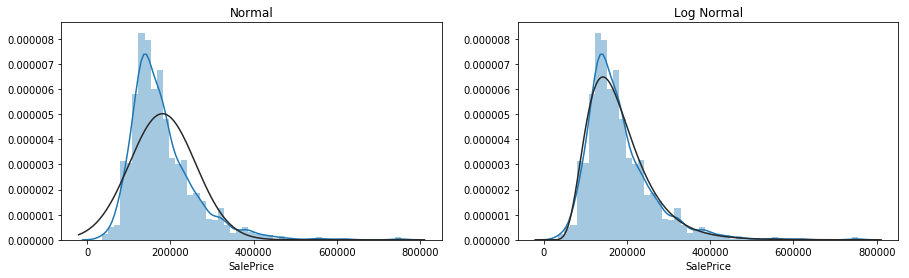

In [0]:
print(train['SalePrice'].describe())

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(15, forward=True)
ax1.set_title('Normal')
sns.distplot(train['SalePrice'], fit=stats.norm, ax=ax1)
ax2.set_title('Log Normal')
sns.distplot(train['SalePrice'], fit=stats.lognorm, ax=ax2)

It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed by a **log transformation**.



## Working with numerical data

We check for normality of all quantitative data using the Shapiro-Wilk test.

In [0]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)

for f in quantitative:
  print(f, ': NOT NORMAL') if normal[f] else print(f, ': NORMAL')

MSSubClass : NOT NORMAL
LotFrontage : NOT NORMAL
LotArea : NOT NORMAL
OverallQual : NOT NORMAL
OverallCond : NOT NORMAL
YearBuilt : NOT NORMAL
YearRemodAdd : NOT NORMAL
MasVnrArea : NOT NORMAL
BsmtFinSF1 : NOT NORMAL
BsmtFinSF2 : NOT NORMAL
BsmtUnfSF : NOT NORMAL
TotalBsmtSF : NOT NORMAL
1stFlrSF : NOT NORMAL
2ndFlrSF : NOT NORMAL
LowQualFinSF : NOT NORMAL
GrLivArea : NOT NORMAL
BsmtFullBath : NOT NORMAL
BsmtHalfBath : NOT NORMAL
FullBath : NOT NORMAL
HalfBath : NOT NORMAL
BedroomAbvGr : NOT NORMAL
KitchenAbvGr : NOT NORMAL
TotRmsAbvGrd : NOT NORMAL
Fireplaces : NOT NORMAL
GarageYrBlt : NOT NORMAL
GarageCars : NOT NORMAL
GarageArea : NOT NORMAL
WoodDeckSF : NOT NORMAL
OpenPorchSF : NOT NORMAL
EnclosedPorch : NOT NORMAL
3SsnPorch : NOT NORMAL
ScreenPorch : NOT NORMAL
PoolArea : NOT NORMAL
MiscVal : NOT NORMAL
MoSold : NOT NORMAL
YrSold : NOT NORMAL


We want to look at the distributions.

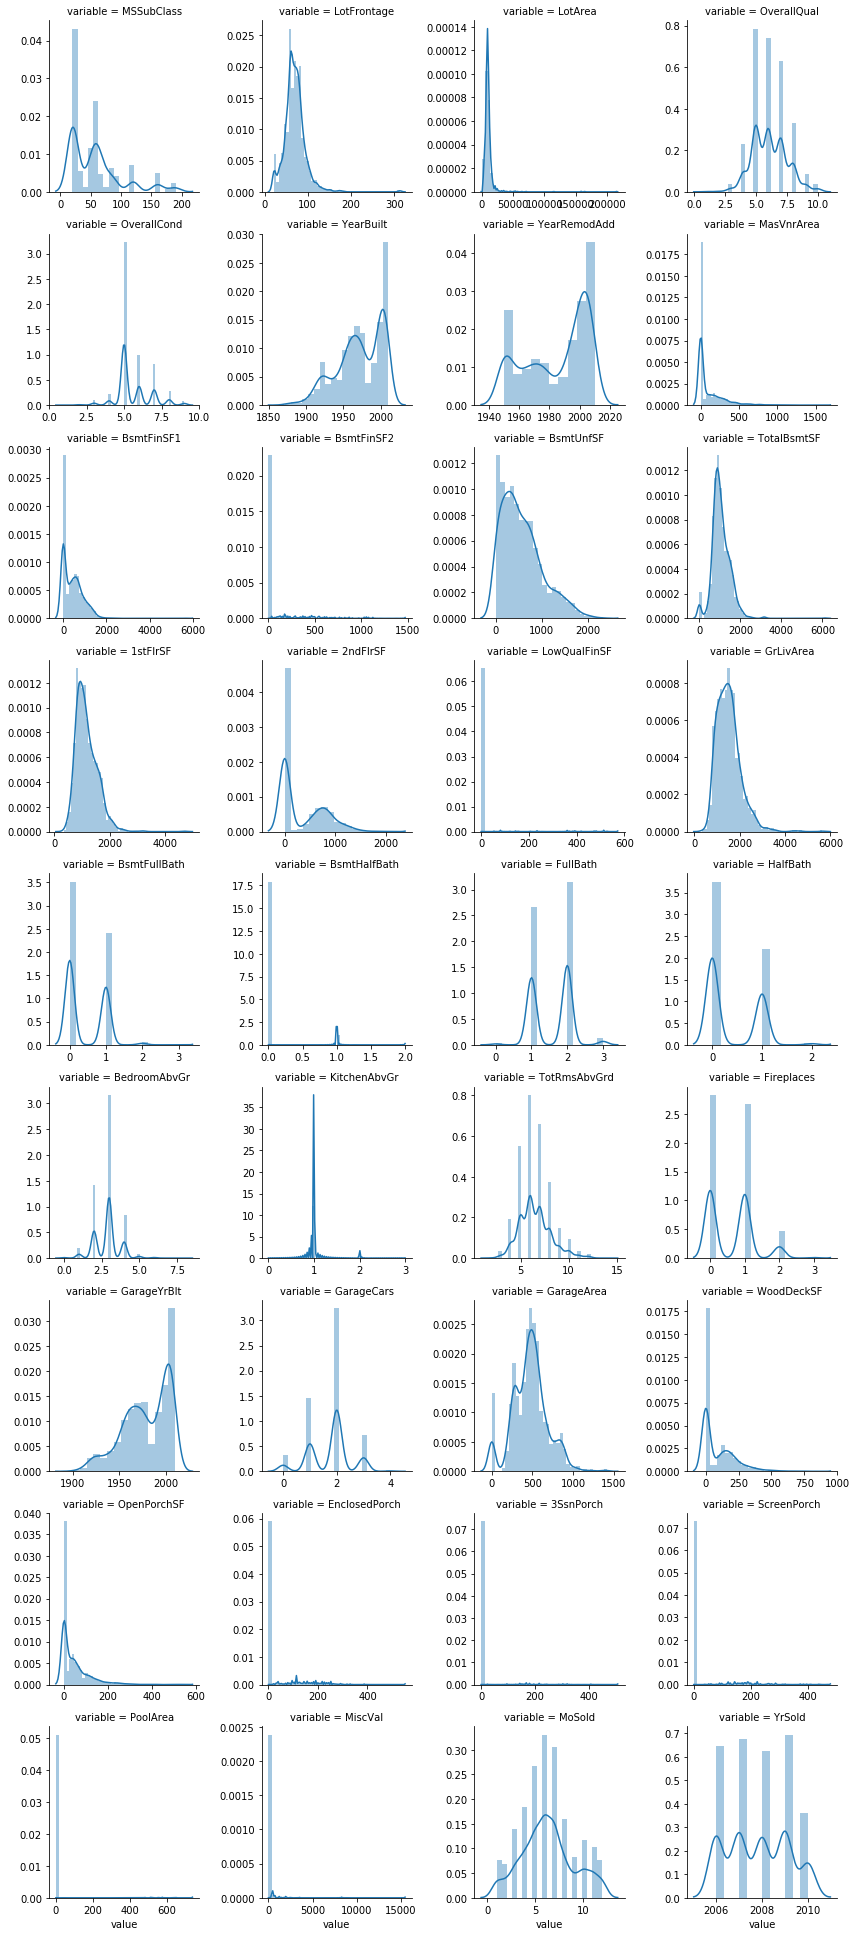

In [0]:
f = pd.melt(train, value_vars=quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(sns.distplot, 'value')

Some independent variables look like good candidates for log transformation: *TotalBsmtSF*, *KitchenAbvGr*, *LotFrontage*, *LotArea* and others.


Next, we want to see the relationship between variables and 'SalePrice'

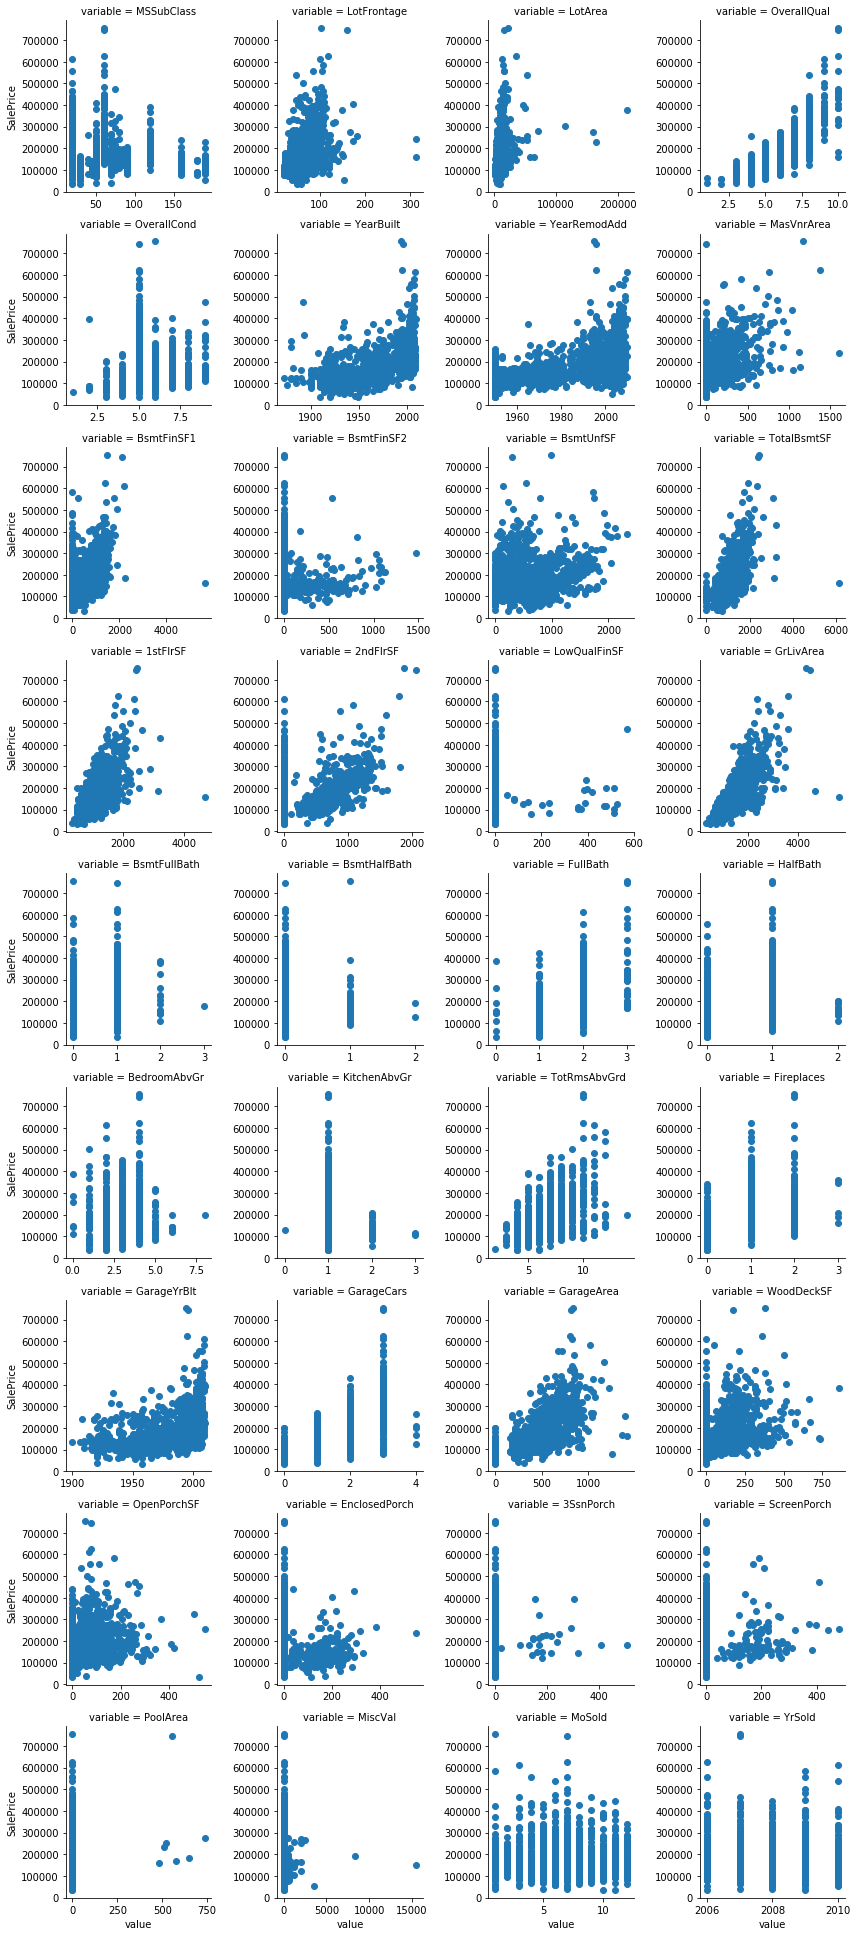

In [0]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(plt.scatter, 'value', 'SalePrice')

## Handling categorical data

With qualitative variables we check distribution of SalePrice with respect to variable values.

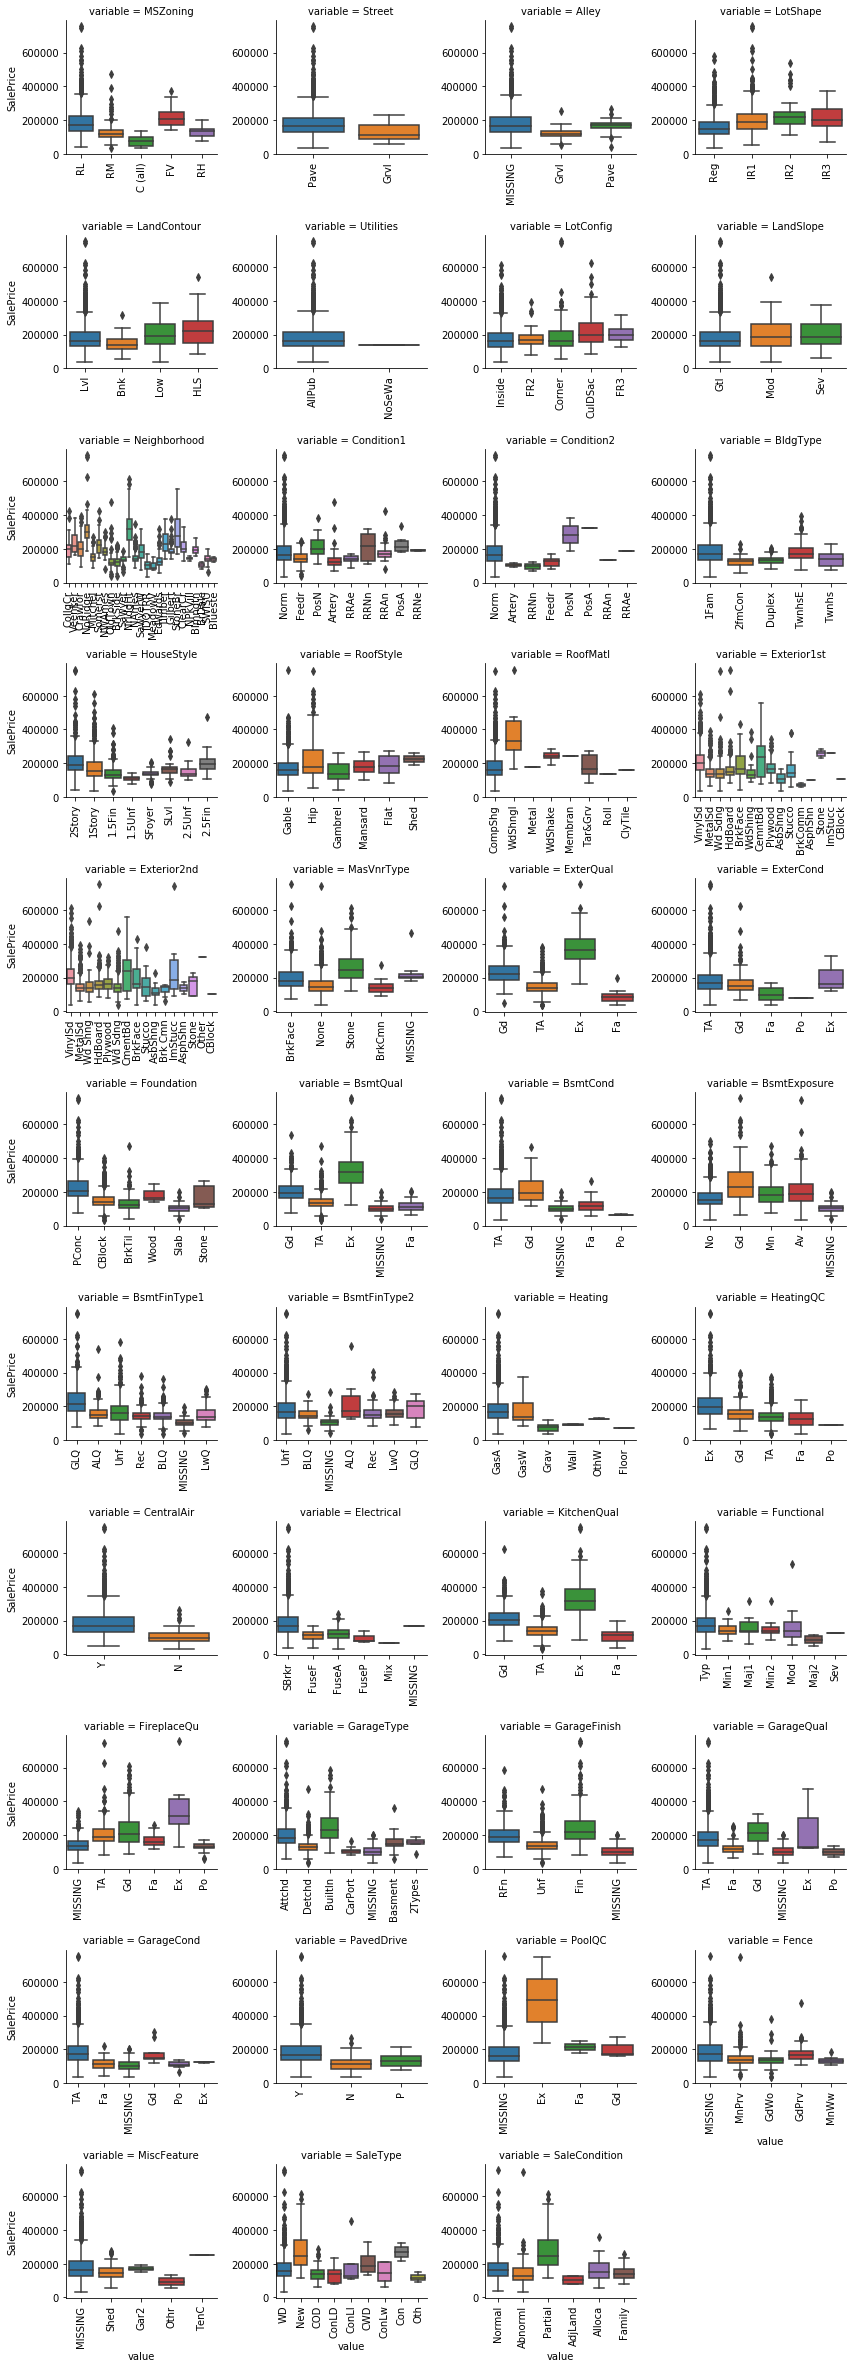

In [0]:
train_nomissing = train.copy()
for c in qualitative:
  train_nomissing[c] = train[c].astype('category')
  if train_nomissing[c].isnull().any():
    train_nomissing[c] = train_nomissing[c].cat.add_categories(['MISSING'])
    train_nomissing[c] = train_nomissing[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
  sns.boxplot(x=x, y=y)
  x=plt.xticks(rotation=90)
f = pd.melt(train_nomissing, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
g = g.map(boxplot, 'value', 'SalePrice')

Some categories seem to more diverse with respect to *SalePrice* than others. *Neighborhood* has big impact on house prices. Most expensive seems to be Partial *SaleCondition*. Having pool on property seems to improve price substantially. There are also differences in variabilities between category values.



## Correlations

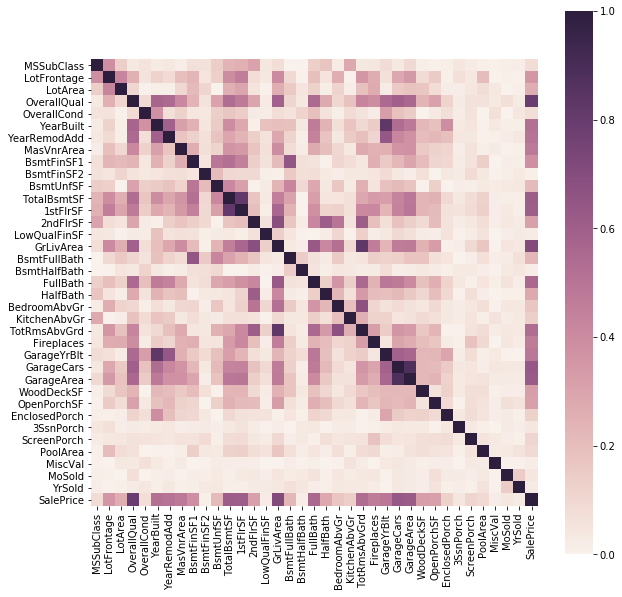

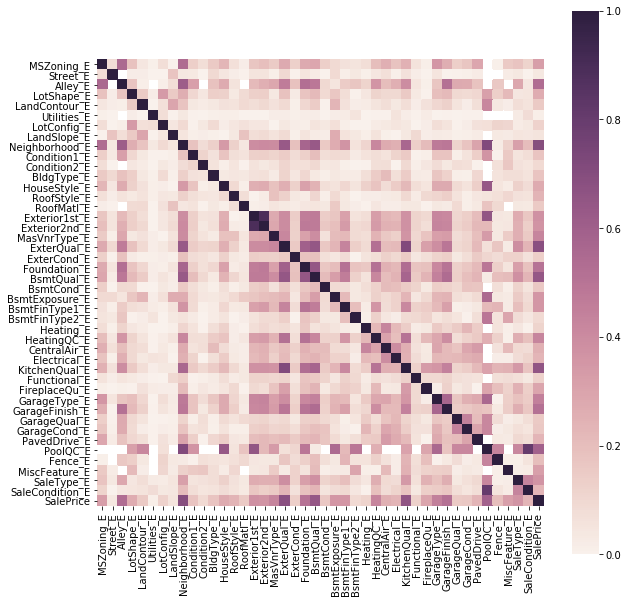

In [0]:
# Enumerate categorical variables
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
train_encoded = train.copy()
for q in qualitative:  
    encode(train_encoded, q)
    qual_encoded.append(q + '_E')
qual_encoded.append('SalePrice')

# Draw correlation matrices
cmap = sns.cubehelix_palette(light = 0.95, as_cmap = True)
plt.figure(figsize = (10, 10))
sns.heatmap(abs(train.drop(['Id'], axis=1).corr(method = 'pearson')), vmin = 0, vmax = 1, square = True, cmap = cmap)
plt.figure(figsize = (10, 10))
sns.heatmap(abs(train_encoded[qual_encoded].corr(method = 'pearson')), vmin = 0, vmax = 1, square = True, cmap = cmap)

## Missing data

In [0]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


*PoolQC*, *MiscFeatures*, *Alley*, *Fence*, *FireplaceQu* have more than 40% of values missing, so we can discard them.

*LotFrontage* has a strong correlation with *LotArea*.
All Garage features have strong correlations with *GarageArea*. The same applies for all Basement features.
Thus, we can ignore these features.

Missing *MasVnrArea* and *Electrical* values are filled with median.

In [0]:
_ = train['MasVnrArea'].fillna(train['MasVnrArea'].median)
_ = train['Electrical'].fillna(train['Electrical'].median)

## Feature Engineering

In [0]:
def log_transform(feature):
  train[feature] = np.log1p(train[feature].values)

quantitative_features = ['LotArea', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']
qualitative_features = ['OverallQual', 'Neighborhood', 'SaleCondition']
bool_features = ['IsNew', 'HasPool']
target = 'SalePrice'

train['IsNew'] = train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

log_transform('LotArea')
log_transform('TotalBsmtSF')
log_transform('GrLivArea')
log_transform('GarageArea')
log_transform('SalePrice')

X = pd.get_dummies(train[quantitative_features + qualitative_features + bool_features])
y = train[target]

print('Shape of training features:', X.shape)
print('Shape of training target:', y.shape)

Shape of training features: (1460, 39)
Shape of training target: (1460,)


## Regression

In [0]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual - predicted)) / len(actual))

reg = LinearRegression().fit(X, y)

print('RMSE: ', error(y, np.exp(reg.predict(X))))

RMSE:  9.54378679421464
